In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'dark')

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

## Import data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_df = train.append(test)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## First Look

In [6]:
print(train.shape)
print(test.shape)
print(titanic_df.shape)

(891, 12)
(418, 11)
(1309, 12)


In [7]:
train_null = pd.DataFrame({'Missing': train.isnull().sum(),
                          'Percentage': round(train.isnull().sum()/len(train)*100, 2)})

train_null

,Missing,Percentage
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [8]:
test_null = pd.DataFrame({'Missing': test.isnull().sum(),
                          'Percentage': round(test.isnull().sum()/len(test)*100, 2)})

test_null

,Missing,Percentage
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,86,20.57
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,1,0.24
Cabin,327,78.23


In [9]:
titanic_df_null = pd.DataFrame({'Missing': titanic_df.isnull().sum(),
                                'Percentage': round(titanic_df.isnull().sum()/len(titanic_df)*100, 2)})

titanic_df_null

,Missing,Percentage
PassengerId,0,0.00
Survived,418,31.93
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,263,20.09
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,1,0.08


In [10]:
print('Train duplicated data: ', train.duplicated().sum())
print('Test duplicated data: ', test.duplicated().sum())
print('Titanic data frame duplicated data: ', titanic_df.duplicated().sum())

Train duplicated data:  0
Test duplicated data:  0
Titanic data frame duplicated data:  0


## Exploratory Data Analysis

### Survived

0    549
1    342
Name: Survived, dtype: int64

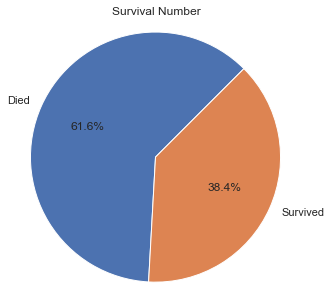

In [11]:
died = (train['Survived'] == 0).sum()
survived = (train['Survived'] == 1).sum()
proportions = [died, survived]

plt.figure(figsize = (5, 5))
plt.pie(proportions, data = train, labels = ['Died', 'Survived'], explode = (0, 0), 
        startangle = 45, autopct = '%1.1f%%', shadow = False)
plt.axis('equal')
plt.title('Survival Number')

train.Survived.value_counts()

### Passenger Distribution

`Sex`

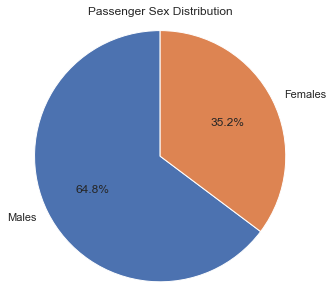

male      577
female    314
Name: Sex, dtype: int64

In [12]:
male = (train['Sex'] == 'male').sum()
female = (train['Sex'] == 'female').sum()
proportions = [male, female]

plt.figure(figsize = (5, 5))
plt.pie(proportions, data = train, labels = ['Males', 'Females'], explode = (0, 0), 
        startangle = 90, autopct = '%1.1f%%', shadow = False)
plt.axis('equal')
plt.title('Passenger Sex Distribution')
plt.show()

train.Sex.value_counts()

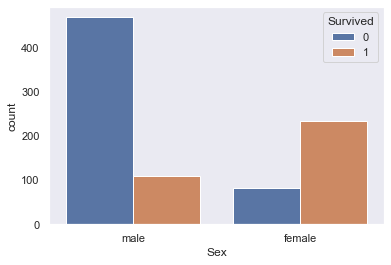

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [13]:
sns.countplot(x = train['Sex'], hue = train['Survived'])
plt.show()

train.groupby(['Sex', 'Survived']).Survived.agg(len)

`Pclass`

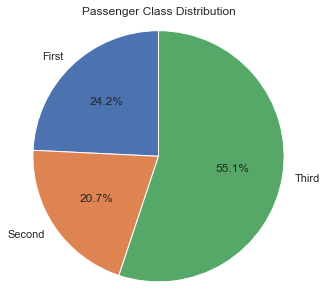

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [14]:
first = (train['Pclass'] == 1).sum()
second = (train['Pclass'] == 2).sum()
third = (train['Pclass'] == 3).sum()
proportions = [first, second, third]

plt.figure(figsize = (5, 5))
plt.pie(proportions, data = train, labels = ['First', 'Second', 'Third'], explode = (0, 0, 0), 
        startangle = 90, autopct = '%1.1f%%', shadow = False)
plt.axis('equal')
plt.title('Passenger Class Distribution')
plt.show()

train.Pclass.value_counts(sort = False)

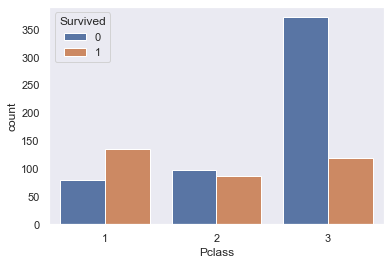

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [15]:
sns.countplot(x = train['Pclass'], hue = train['Survived'])
plt.show()

train.groupby(['Pclass', 'Survived']).Survived.agg(len)

`Age`

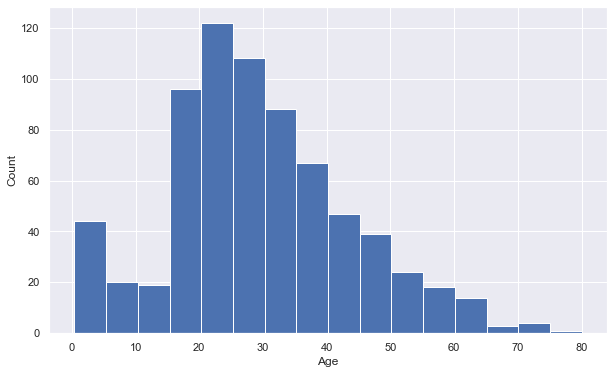

In [16]:
plt.figure(figsize = (10, 6))
train['Age'].hist(bins = 16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

`Siblings and Spouses`

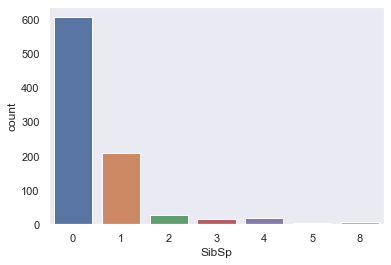

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [17]:
sns.countplot(x = train['SibSp'])
plt.show()

train.SibSp.value_counts(sort = False)

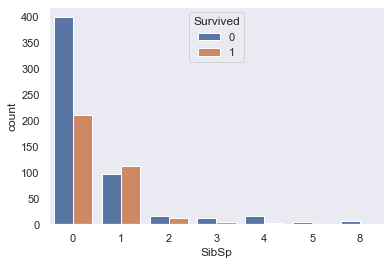

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [18]:
sns.countplot(x = train['SibSp'], hue = train['Survived'])
plt.show()

train.groupby(['SibSp', 'Survived']).Survived.agg(len)

`Parents and Children`

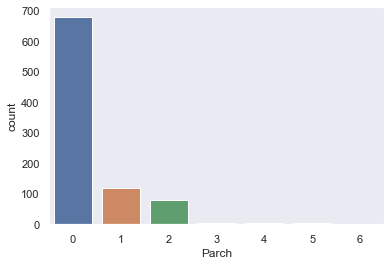

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [19]:
sns.countplot(x = train['Parch'])
plt.show()

train.Parch.value_counts()

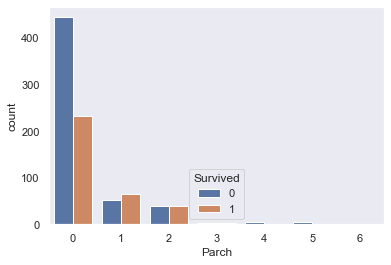

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [20]:
sns.countplot(x = train['Parch'], hue = train['Survived'])
plt.show()

train.groupby(['Parch', 'Survived']).Survived.agg(len)

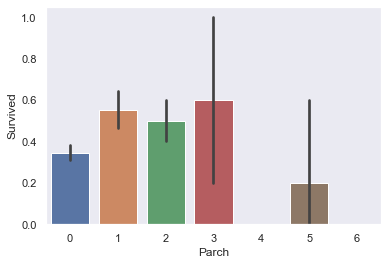

In [21]:
sns.barplot(x = train['Parch'], y = train['Survived'])
plt.show()

`Ticket`

In [22]:
train['Ticket'].value_counts().head(10)

1601            7
CA. 2343        7
347082          7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
2666            4
4133            4
Name: Ticket, dtype: int64

In [23]:
train[(train.Ticket == '1601')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [24]:
titanic_df[(titanic_df.Ticket == '1601')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1.0,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0.0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1.0,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1.0,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1.0,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0.0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1.0,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
39,931,NaN,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S


In [25]:
train[(train.Ticket == 'CA. 2343')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [26]:
titanic_df[(titanic_df.Ticket == 'CA. 2343')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


`Fare`

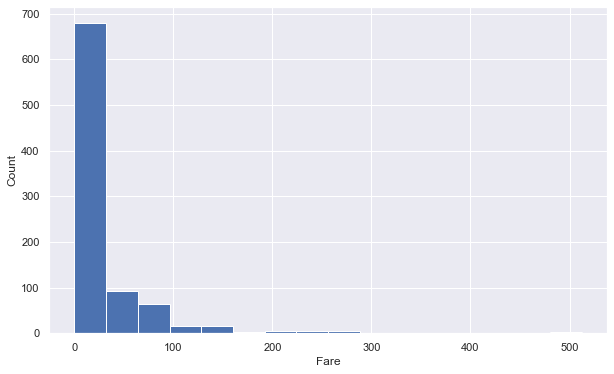

In [27]:
plt.figure(figsize = (10, 6))
train['Fare'].hist(bins = 16)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [28]:
train.Fare.sort_values(ascending = False).head(10)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
Name: Fare, dtype: float64

In [29]:
train['Fare_bin5'] = pd.qcut(train['Fare'], 5)

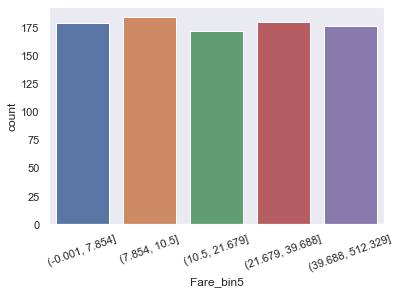

(-0.001, 7.854]      179
(7.854, 10.5]        184
(10.5, 21.679]       172
(21.679, 39.688]     180
(39.688, 512.329]    176
Name: Fare_bin5, dtype: int64

In [30]:
ax = sns.countplot(x = train['Fare_bin5'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
plt.show()

train['Fare_bin5'].value_counts(sort = False)

`Cabin`

`Embarked`

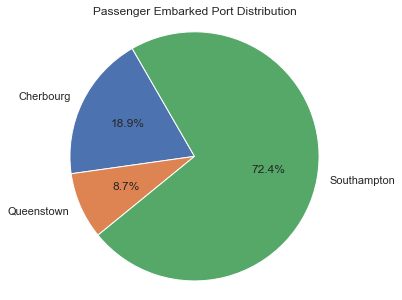

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
Cherbourg = (train['Embarked'] == 'C').sum()
Queenstown = (train['Embarked'] == 'Q').sum()
Southampton = (train['Embarked'] == 'S').sum()
proportions = [Cherbourg, Queenstown, Southampton]

plt.figure(figsize = (5, 5))
plt.pie(proportions, data = train, labels = ['Cherbourg', 'Queenstown', 'Southampton'], explode = (0, 0, 0), 
        startangle = 120, autopct = '%1.1f%%', shadow = False)
plt.axis('equal')
plt.title('Passenger Embarked Port Distribution')
plt.show()

train.Embarked.value_counts()

## Feature Engineering and Dealing with Missing Values


`Embarked`

In [32]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin5
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,"(39.688, 512.329]"
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,"(39.688, 512.329]"


They have the same ticket, so it can be assumed that they embarked from the same port. To fill in the missing data, I use the **mode** value.

In [33]:
train['Embarked'] = train['Embarked'].fillna('S')

In [34]:
# check the data filled in using ticket number
train[train['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin5
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,"(39.688, 512.329]"
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,"(39.688, 512.329]"


`Cabin`

**Cabin** has 77% missing value on the train data set and 78% on the test data set. I chose to delete it.

In [35]:
train.drop('Cabin', axis = 1, inplace = True)

In [36]:
test.drop('Cabin', axis = 1, inplace = True)

`Age`

In [37]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
test.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [39]:
titanic_df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

Title or Salutation from **Name** column can be use to estimate the passenger's age with the missing **Age** value.

For the first step, I created new feature called **Title**.

In [40]:
titanic_df['Title'] = titanic_df.Name.str.extract(r'([A-Za-z]+)\.', expand = False)
titanic_df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Jonkheer      1
Sir           1
Capt          1
Lady          1
Don           1
Dona          1
Mme           1
Countess      1
Name: Title, dtype: int64

In [41]:
train['Title'] = train.Name.str.extract(r'([A-Za-z]+)\.', expand = False)

test['Title'] = test.Name.str.extract(r'([A-Za-z]+)\.', expand = False)

In [42]:
titanic_df.groupby('Title').Age.agg([len, min, max, 'mean', 'median'])

,len,min,max,mean,median
Title,,,,,
Capt,1.0,70.00,70.0,70.000000,70.0
Col,4.0,47.00,60.0,54.000000,54.5
Countess,1.0,33.00,33.0,33.000000,33.0
Don,1.0,40.00,40.0,40.000000,40.0
Dona,1.0,39.00,39.0,39.000000,39.0
Dr,8.0,23.00,54.0,43.571429,49.0
Jonkheer,1.0,38.00,38.0,38.000000,38.0
Lady,1.0,48.00,48.0,48.000000,48.0
Major,2.0,45.00,52.0,48.500000,48.5


After seen **Title** and **Age** table above, I chose to group them in 5 categories: Mr, Mrs, Master, Miss and the rest as Others.

In [43]:
titanic_df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Capt', 'Ms', 'Countess',
                        'Jonkheer', 'Lady', 'Don', 'Dona', 'Sir', 'Mme'], 'Others', inplace = True)

train['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Capt', 'Ms', 'Countess',
                        'Jonkheer', 'Lady', 'Don', 'Dona', 'Sir', 'Mme'], 'Others', inplace = True)

test['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Capt', 'Ms', 'Countess',
                        'Jonkheer', 'Lady', 'Don', 'Dona', 'Sir', 'Mme'], 'Others', inplace = True)

In [44]:
titanic_df.groupby('Title').Age.agg([len, min, max, 'mean', 'median'])

,len,min,max,mean,median
Title,,,,,
Master,61.0,0.33,14.5,5.482642,4.0
Miss,260.0,0.17,63.0,21.774238,22.0
Mr,757.0,11.00,80.0,32.252151,29.0
Mrs,197.0,14.00,76.0,36.994118,35.5
Others,34.0,23.00,70.0,42.656250,44.5


Use median value to fill **Age** missing values.

In [45]:
def myfunc(age, title):
    if pd.isnull(age) and title == 'Master':
        age = 4.0
    elif pd.isnull(age) and title == 'Miss':
        age = 22.0
    elif pd.isnull(age) and title == 'Mr':
        age = 29.0
    elif pd.isnull(age) and title == 'Mrs':
        age = 35.5
    elif pd.isnull(age) and title == 'Others':
        age = 44.5
    else:
        age = age
    return age

In [46]:
train['Age_Filled'] = train.apply(lambda x: myfunc(x['Age'], x['Title']), axis=1)
test['Age_Filled'] = test.apply(lambda x: myfunc(x['Age'], x['Title']), axis=1)

In [47]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Fare_bin5        0
Title            0
Age_Filled       0
dtype: int64

In [48]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Title           0
Age_Filled      0
dtype: int64

Drop **Age** column, since it has been replaced with a new **Age_Filled** column.

In [49]:
train.drop('Age', axis = 1, inplace = True)

test.drop('Age', axis = 1, inplace = True)

`Fare`

In [50]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Filled
152,1044,3,"Storey, Mr. Thomas",male,0,0,3701,NaN,S,Mr,60.5


In [51]:
test['Fare'].median()

14.4542

In [52]:
test.groupby('Pclass').Fare.agg([len, 'mean', 'median'])

,len,mean,median
Pclass,,,
1,107.0,94.280297,60.0000
2,93.0,22.202104,15.7500
3,218.0,12.459678,7.8958


In [53]:
test[test['Ticket'] == '3701']

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Filled
152,1044,3,"Storey, Mr. Thomas",male,0,0,3701,NaN,S,Mr,60.5


In [54]:
test['Fare'] = test['Fare'].fillna('15.7500')

In [55]:
test[test['Ticket'] == '3701']

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Filled
152,1044,3,"Storey, Mr. Thomas",male,0,0,3701,15.7500,S,Mr,60.5


## Data Transformation

In [56]:
train['Sex']=train['Sex'].map({'male':0,'female':1})

test['Sex']=test['Sex'].map({'male':0,'female':1})

In [57]:
train['Embarked']=train['Embarked'].map({'S':0,'C':1,'Q':2})

test['Embarked']=test['Embarked'].map({'S':0,'C':1,'Q':2})

In [58]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [59]:
train['Title'] = train['Title'].map({'Mr':0, 'Mrs':1, 'Miss':3, 'Master':4, 'Others': 5})

test['Title'] = test['Title'].map({'Mr':0, 'Mrs':1, 'Miss':3, 'Master':4, 'Others': 5})

In [60]:
train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Fare_bin5,Title,Age_Filled
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,0,"(-0.001, 7.854]",0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,1,"(39.688, 512.329]",1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,0,"(7.854, 10.5]",3,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,0,"(39.688, 512.329]",1,35.0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,0,"(7.854, 10.5]",0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,0,211536,13.0000,0,"(10.5, 21.679]",5,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,0,0,112053,30.0000,0,"(21.679, 39.688]",3,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,2,W./C. 6607,23.4500,0,"(21.679, 39.688]",3,22.0
889,890,1,1,"Behr, Mr. Karl Howell",0,0,0,111369,30.0000,1,"(21.679, 39.688]",0,26.0


In [61]:
test

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Filled
0,892,3,"Kelly, Mr. James",0,0,0,330911,7.8292,2,0,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,363272,7.0,0,1,47.0
2,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,9.6875,2,0,62.0
3,895,3,"Wirz, Mr. Albert",0,0,0,315154,8.6625,0,0,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,3101298,12.2875,0,1,22.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,0,0,A.5. 3236,8.05,0,0,29.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0,0,PC 17758,108.9,1,5,39.0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0,0,SOTON/O.Q. 3101262,7.25,0,0,38.5
416,1308,3,"Ware, Mr. Frederick",0,0,0,359309,8.05,0,0,29.0


## Feature Importance

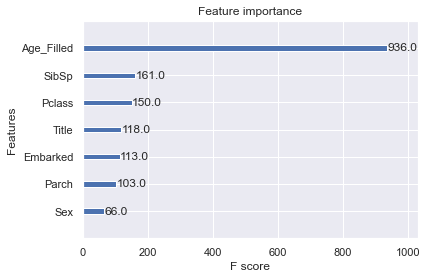

In [62]:
X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare', 'Fare_bin5'], axis = 1)
y = train['Survived']

model = XGBClassifier()
model.fit(X, y)

# plot feature importance
plot_importance(model)
plt.show()

In [81]:
model = XGBClassifier(n_estimators = 200)

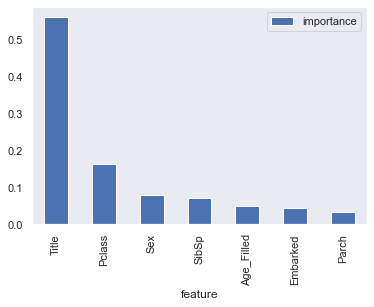

In [83]:
model.fit(X, y)
importance = pd.DataFrame({'feature' : X.columns, 'importance': np.round(model.feature_importances_, 3)})
importance = importance.sort_values('importance', ascending = False).set_index('feature')

importance.plot(kind = 'bar')
plt.show()

In [63]:
# final = ['Age_Filled', 'SibSp', 'Pclass', 'Title', 'Embarked']

## ML Model

### XGBoost

In [70]:
train_copy = train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Fare_bin5'], axis = 1)

In [71]:
test_copy = test.drop(['PassengerId', 'Name', 'Ticket','Fare'], axis = 1)

In [72]:
train_copy.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_Filled
0,0,3,0,1,0,0,0,22.0
1,1,1,1,1,0,1,1,38.0
2,1,3,1,0,0,0,3,26.0
3,1,1,1,1,0,0,1,35.0
4,0,3,0,0,0,0,0,35.0


In [73]:
x=train_copy.drop(['Survived'], axis=1)
y=train_copy['Survived']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [75]:
#Defining the parameters to search within
param_grid = {
'n_estimators': range(6, 10),
'max_depth': range(3, 8),
'learning_rate': [.2, .3, .4],
'colsample_bytree': [.7, .8, .9, 1]
}

#Specifying our classifier
xgb = XGBClassifier()

#Searching for the best parameters
g_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
cv = 3, n_jobs = 1, verbose = 0, return_train_score = True)

#Fitting the model using best parameters found
g_search.fit(x_train, y_train)

#Printing the best parameters found
print(g_search.best_params_)

{'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 6}


In [76]:
g_search.score(x_test, y_test)

0.8116591928251121

In [78]:
prediction = g_search.predict(test_copy)
prediction

# pd.DataFrame(prediction, columns=['prediction']).to_csv('XGBoost_Prediction.csv')

In [88]:
pd.DataFrame(test['PassengerId'])

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308
